# Exercício

O dataset utilizado neste execício é o [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries), disponibilizado em uma competição do Kaggle.

In [8]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

### Faça a leitura do arquivo "Salaries.csv"

In [2]:
df = pd.read_csv('../../data/Salaries.csv')

In [5]:
df.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"167,411.18",0.00,"400,184.25",nan,"567,595.43","567,595.43",2011,nan,San Francisco,nan
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),"155,966.02","245,131.88","137,811.38",nan,"538,909.28","538,909.28",2011,nan,San Francisco,nan
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),"212,739.13","106,088.18","16,452.60",nan,"335,279.91","335,279.91",2011,nan,San Francisco,nan


### Apresente algumas informações sobre o dataframe com .info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


### Qual a média de valores na coluna "BasePay"

In [7]:
df['BasePay'].mean()

66325.4488404877

### Qual o maior valor da coluna "OvertimePay"

In [8]:
df['OvertimePay'].max()

245131.88

### Qual o "JobTitle" de ALBERT PARDINI (EmployeeName) ? 

In [45]:
df[df['EmployeeName'] == 'ALBERT PARDINI']['JobTitle'].iloc[0]


'CAPTAIN III (POLICE DEPARTMENT)'

### Qual o salário de ALBERT PARDINI, incluindo os benefícios (TotalPayBenefits)?

In [10]:
df[df['EmployeeName'] == 'ALBERT PARDINI']['TotalPayBenefits']

2   335,279.91
Name: TotalPayBenefits, dtype: float64

### Qual o nome da pessoa com o maior salário? E quem tem o menor salário?

In [20]:
df[(df.BasePay == df.BasePay.max()) | (df.BasePay == df.BasePay.min())]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
72832,72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.00,6.56,83.01,89.57,2012,nan,San Francisco,nan
72925,72926,Gregory P Suhr,Chief of Police,"319,275.01",0.00,"20,007.06","86,533.21","339,282.07","425,815.28",2013,nan,San Francisco,nan


### Qual a média salarial dos funcionários de 2011 a 2014? E qual a média do salário por ano?

In [13]:
df[(df['Year']>=2011) & (df['Year']<=2014)]['BasePay'].mean()

66325.4488404877

In [16]:
df[(df['Year']>=2011) & (df['Year']<=2014)].groupby(by='Year')['BasePay'].mean()

Year
2011   63,595.96
2012   65,436.41
2013   69,630.03
2014   66,564.42
Name: BasePay, dtype: float64

### Qual o desvio padrão dos salários, incluindo os benefícios?

In [17]:
df['TotalPayBenefits'].std()

62793.533483237705


### Quantas pessoas estão dentro do intervalo de 1 desvio padrão?

In [107]:
limite_min = df['BasePay'].mean() - df['BasePay'].std()
limite_max = df['BasePay'].mean() + df['BasePay'].std()

df[(df['BasePay']>=limite_min) & (df['BasePay']<=limite_max)]['Id'].count()

91647

In [120]:
def in_first_std(x, p_mean, p_std):
    return (( x >= (p_mean-p_std)) & ( x <= (p_mean+p_std)))

df[df['BasePay'].apply(in_first_std, args=(df.BasePay.mean(), df.BasePay.std()))]['Id'].count()

91647

========================================================

## Desafios

### O salário segue uma distribuição normal?

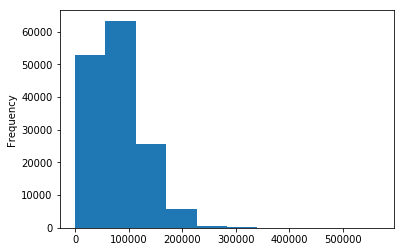

In [52]:
df['TotalPay'].plot.hist()

### Para os campos com valores nulos, como você pensaria em tratá-los?

In [47]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,"148,654.00","148,045.00","148,650.00","148,650.00","112,491.00","148,654.00","148,654.00","148,654.00",0.00,0.00
mean,"74,327.50","66,325.45","5,066.06","3,648.77","25,007.89","74,768.32","93,692.55","2,012.52",nan,nan
std,"42,912.86","42,764.64","11,454.38","8,056.60","15,402.22","50,517.01","62,793.53",1.12,nan,nan
min,1.00,-166.01,-0.01,"-7,058.59",-33.89,-618.13,-618.13,"2,011.00",nan,nan
25%,"37,164.25","33,588.20",0.00,0.00,"11,535.40","36,169.00","44,065.65","2,012.00",nan,nan
50%,"74,327.50","65,007.45",0.00,811.27,"28,628.62","71,426.61","92,404.09","2,013.00",nan,nan
75%,"111,490.75","94,691.05","4,658.18","4,236.07","35,566.85","105,839.13","132,876.45","2,014.00",nan,nan
max,"148,654.00","319,275.01","245,131.88","400,184.25","96,570.66","567,595.43","567,595.43","2,014.00",nan,nan


### Você conseguiria criar uma nova variável com base nas informações existentes?

In [29]:
df['media'] = df['TotalPay'].mean() ; df.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,media_salarial,variacao,media
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"167,411.18",0.00,"400,184.25",nan,"567,595.43","567,595.43",2011,nan,San Francisco,nan,"74,768.32","74,768.32","74,768.32"
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),"155,966.02","245,131.88","137,811.38",nan,"538,909.28","538,909.28",2011,nan,San Francisco,nan,"74,768.32","74,768.32","74,768.32"
